In [1]:
# Importing
%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
import seaborn as sns

In [2]:
from data_handler.DataHandler import DataHandler

c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-

In [3]:
handler = DataHandler(readAllDataNow = True) 

In [4]:
columns = ['TarX', 'TarY', 'GazeX', 'GazeY', 'PosX', 'PosY', 'PosZ', 'OrX', 'OrY', 'OrZ']

In [41]:
subjects_raw = {i: handler.getAllDatasetPairsFor(i) for i in range(1, 3)}

In [42]:
subjects = {}
correlations = []
for subj in subjects_raw:
    subjects[subj] = {}
    for t in subjects_raw[subj]:
        concatenated = np.concatenate((subjects_raw[subj][t][0],
                                       subjects_raw[subj][t][1][:, :8]), 
                                      axis = 1)
        df = pd.DataFrame(concatenated, columns = columns)
        df[['TarX', 'GazeX']] =  -1*df[['TarX', 'GazeX']]/5 + 192
        df[['TarY', 'GazeY']] = df[['TarY', 'GazeY']]/5 + 55
        subjects[subj][t] = df # (df-df.min())/(df.max()-df.min())
        correlations.append(subjects[subj][t].corr())

In [43]:
corr_df = correlations[0].copy()

In [44]:
for df in correlations[1:]:
    corr_df = corr_df.add(df)

In [45]:
corr_df

,TarX,TarY,GazeX,GazeY,PosX,PosY,PosZ,OrX,OrY,OrZ
TarX,34.000000,-1.703290,13.542067,4.181247,14.162975,1.672039,-1.001137,1.520309,-13.260002,-3.431357
TarY,-1.703290,34.000000,-2.172140,10.750981,0.785766,13.820072,-4.760460,9.082586,1.780690,1.730725
GazeX,13.542067,-2.172140,34.000000,8.144882,22.073075,7.838843,-6.505516,-2.963432,-21.478714,-10.137605
GazeY,4.181247,10.750981,8.144882,34.000000,9.694733,17.241655,-7.677551,14.237144,-4.100903,2.325003
PosX,14.162975,0.785766,22.073075,9.694733,34.000000,20.557168,-22.718293,-3.238097,-18.759197,-4.743674
PosY,1.672039,13.820072,7.838843,17.241655,20.557168,34.000000,-25.477168,4.290571,-4.742649,-0.576623
PosZ,-1.001137,-4.760460,-6.505516,-7.677551,-22.718293,-25.477168,34.000000,1.809671,2.836654,-1.125462
OrX,1.520309,9.082586,-2.963432,14.237144,-3.238097,4.290571,1.809671,34.000000,2.847403,6.346948
OrY,-13.260002,1.780690,-21.478714,-4.100903,-18.759197,-4.742649,2.836654,2.847403,34.000000,8.041152
OrZ,-3.431357,1.730725,-10.137605,2.325003,-4.743674,-0.576623,-1.125462,6.346948,8.041152,34.000000


In [46]:
avg = corr_df/len(correlations)

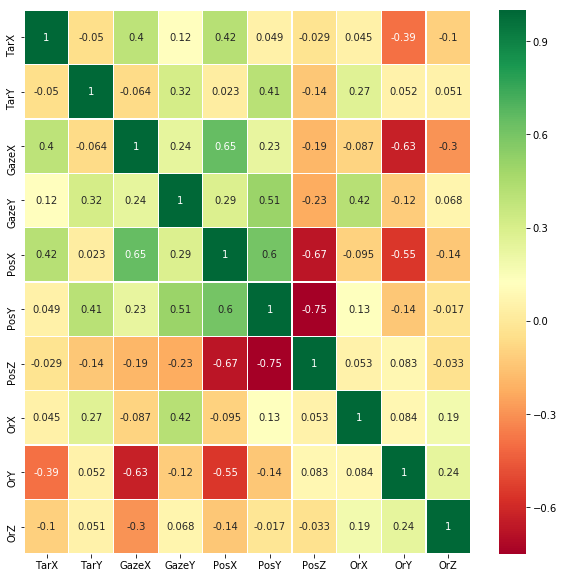

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(avg, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [48]:
table = avg[['TarX', 'TarY', 'GazeX', 'GazeY']].T.drop(columns=['TarX', 'TarY'])

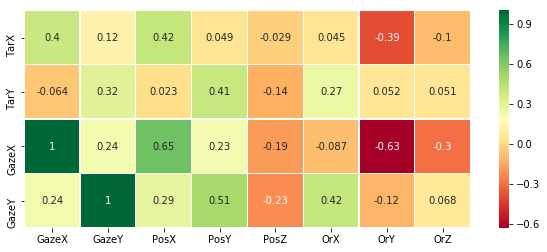

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(table, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);